## Observations and Insights 

#### Observation 1
*Capomulin and Ramicane seem to be more effective and consistent at shrinking tumor volumes with Capomulin having an average tumor volume of 40.68 (SD=4.99) and Ramicane having an average tumor volume of 40.22 (SD=4.85). The rest of the treatments all have average tumor volumes above 52 with standard deviations over 6.*
  
#### Observation 2 
*As time increases, the tumor volume of mice treated with Capomulin tends to decrease.*  
  
#### Observation 3  
*There is a strong positive relationship between Tumor Volume and Weight in mice treated with Capomulin (Pearson Correlation Coefficient = 0.88).*

In [269]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from random import randint


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [270]:
# Checking the number of mice.
num_mice = len(df["Mouse ID"].unique())
print(f'There are {num_mice} mice in the dataset')

There are 249 mice in the dataset


In [271]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = df[df.duplicated(['Mouse ID', 'Timepoint'])]
mouse_id = duplicate_rows['Mouse ID'].unique()
print(f'The duplicate rows are from mouse {mouse_id[0]}')

The duplicate rows are from mouse g989


In [272]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_data = df[df['Mouse ID']==mouse_id[0]]
all_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [273]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID']!=mouse_id[0]]

In [274]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_df["Mouse ID"].unique())
print(f'There are {num_mice} mice in the clean dataset')

There are 248 mice in the clean dataset


## Summary Statistics

In [275]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_drug = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
col_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
col_median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
col_var = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
col_sd = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
col_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_regimen = pd.DataFrame({'Mean(Tumor Vol)': col_mean,
                              'Median(Tumor Vol)': col_median,
                              'Var(Tumor Vol)': col_var,
                              'SD(Tumor Vol)': col_sd,
                              'SEM(Tumor Vol)': col_sem})

In [276]:
print(summary_regimen)

              Mean(Tumor Vol)  Median(Tumor Vol)  Var(Tumor Vol)  \
Drug Regimen                                                       
Capomulin           40.675741          41.557809       24.947764   
Ceftamin            52.591172          51.776157       39.290177   
Infubinol           52.884795          51.820584       43.128684   
Ketapril            55.235638          53.698743       68.553577   
Naftisol            54.331565          52.509285       66.173479   
Placebo             54.033581          52.288934       61.168083   
Propriva            52.320930          50.446266       43.852013   
Ramicane            40.216745          40.673236       23.486704   
Stelasyn            54.233149          52.431737       59.450562   
Zoniferol           53.236507          51.818479       48.533355   

              SD(Tumor Vol)  SEM(Tumor Vol)  
Drug Regimen                                 
Capomulin          4.994774        0.329346  
Ceftamin           6.268188        0.469821  

In [277]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_regimen2 = clean_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]

In [278]:
summary_regimen2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

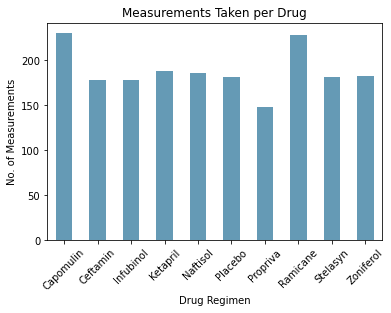

<Figure size 432x288 with 0 Axes>

In [279]:
#### Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
## total number of measurements = count of timepoints per drug regimen
measurements = clean_df.groupby("Drug Regimen").count()["Timepoint"]
measurements_bar = measurements.plot(kind="bar", color = "#659ab5")
plt.title("Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Measurements")
plt.xticks(rotation=45)
plt.show()
plt.savefig('images/measurements_pandasplot.png')

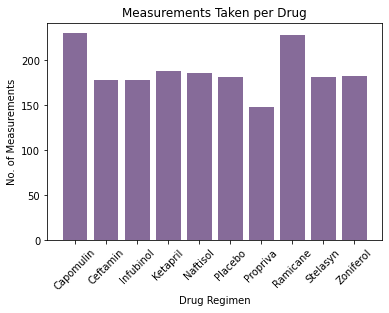

<Figure size 432x288 with 0 Axes>

In [280]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(col_regimen))
#create ticks
tick_locs = [value for value in x_axis]
plt.bar(x_axis, measurements, color="#866b99", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Measurements")
plt.xticks(ticks=tick_locs, rotation=45, labels=measurements.index)
plt.title("Measurements Taken per Drug")
plt.show()
plt.savefig("images/measurements_matplotlib.png")

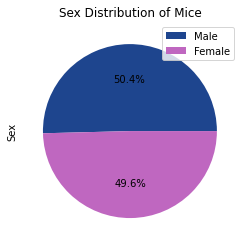

In [281]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_mice = clean_df.drop_duplicates(subset="Mouse ID")
sexes = unique_mice["Sex"].value_counts()
sexes.plot(kind="pie", legend=True, autopct="%1.1f%%", labels=None, title="Sex Distribution of Mice",
          colors=['#1e458e', '#Bf67c0'])
plt.savefig('images/sexes_pandas.png')

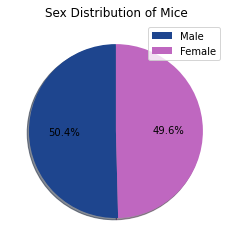

<Figure size 432x288 with 0 Axes>

In [282]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sexes, labels=None, autopct="%1.1f%%", shadow=True, colors=['#1e458e', '#Bf67c0'],
       startangle=90)
plt.title("Sex Distribution of Mice")
plt.legend(["Male", "Female"])
plt.show()
plt.savefig('images/sexes_matplotlib.png')

## Quartiles, Outliers and Boxplots

In [283]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
## Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby("Mouse ID").max()["Timepoint"]

## Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_df = pd.merge(last_timepoints, clean_df, on=['Mouse ID', 'Timepoint'])

In [284]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#individual subsets for each treatment
capomulin_df = final_df[final_df['Drug Regimen']=='Capomulin']
ramicane_df = final_df[final_df['Drug Regimen']=='Ramicane']
infubinol_df = final_df[final_df['Drug Regimen']=='Infubinol']
ceftamin_df = final_df[final_df['Drug Regimen']=='Ceftamin']

#determine outliers for each treatment
##capomulin
tumor_vols_capo = capomulin_df['Tumor Volume (mm3)']
q1_capo = tumor_vols_capo.quantile(0.25)
q3_capo = tumor_vols_capo.quantile(0.75)
iqr_capo = q3_capo - q1_capo
lower_capo = q1_capo - 1.5*iqr_capo
upper_capo = q3_capo + 1.5*iqr_capo
potential_outliers_capo = capomulin_df[(capomulin_df['Tumor Volume (mm3)']<lower_capo) |
                                 (capomulin_df['Tumor Volume (mm3)']>upper_capo)]
##ramicane
tumor_vols_rami = ramicane_df['Tumor Volume (mm3)']
q1_rami = tumor_vols_rami.quantile(0.25)
q3_rami = tumor_vols_rami.quantile(0.75)
iqr_rami = q3_rami - q1_rami
lower_rami = q1_rami - 1.5*iqr_rami
upper_rami = q3_rami + 1.5*iqr_rami
potential_outliers_rami = ramicane_df[(ramicane_df['Tumor Volume (mm3)']<lower_rami) |
                                 (ramicane_df['Tumor Volume (mm3)']>upper_rami)]
##infubinol
tumor_vols_infu = infubinol_df['Tumor Volume (mm3)']
q1_infu = tumor_vols_infu.quantile(0.25)
q3_infu = tumor_vols_infu.quantile(0.75)
iqr_infu = q3_infu - q1_infu
lower_infu = q1_infu - 1.5*iqr_infu
upper_infu = q3_infu + 1.5*iqr_infu
potential_outliers_infu = infubinol_df[(infubinol_df['Tumor Volume (mm3)']<lower_infu) |
                                 (infubinol_df['Tumor Volume (mm3)']>upper_infu)]
##ceftamin
tumor_vols_ceft = ceftamin_df['Tumor Volume (mm3)']
q1_ceft = tumor_vols_ceft.quantile(0.25)
q3_ceft = tumor_vols_ceft.quantile(0.75)
iqr_ceft = q3_ceft - q1_ceft
lower_ceft = q1_ceft - 1.5*iqr_ceft
upper_ceft = q3_ceft + 1.5*iqr_ceft
potential_outliers_ceft = ceftamin_df[(ceftamin_df['Tumor Volume (mm3)']<lower_ceft) |
                                 (ceftamin_df['Tumor Volume (mm3)']>upper_ceft)]

print(f'Tumor volumes in the Capomulin treatment group that are below {round(lower_capo,2)} or above {round(upper_capo,2)} could be considered outliers.')
print(f'There are {len(potential_outliers_capo)} potential outliers in the Capomulin treatment group.')
print('------------------------------------------------------------------')
print(f'Tumor volumes in the Ramicane treatment group that are below {round(lower_rami,2)} or above {round(upper_rami,2)} could be considered outliers.')
print(f'There are {len(potential_outliers_rami)} potential outliers in the Ramicane treatment group.')
print('------------------------------------------------------------------')
print(f'Tumor volumes in the Infubinol treatment group that are below {round(lower_infu,2)} or above {round(upper_infu,2)} could be considered outliers.')
print(f'There is {len(potential_outliers_infu)} potential outlier in the Infubinol treatment group.')
print('------------------------------------------------------------------')
print(f'Tumor volumes in the Ceftamin treatment group that are below {round(lower_ceft,2)} or above {round(upper_ceft,2)} could be considered outliers.')
print(f'There are {len(potential_outliers_ceft)} potential outliers in the Ceftamin treatment group.')

Tumor volumes in the Capomulin treatment group that are below 20.7 or above 51.83 could be considered outliers.
There are 0 potential outliers in the Capomulin treatment group.
------------------------------------------------------------------
Tumor volumes in the Ramicane treatment group that are below 17.91 or above 54.31 could be considered outliers.
There are 0 potential outliers in the Ramicane treatment group.
------------------------------------------------------------------
Tumor volumes in the Infubinol treatment group that are below 36.83 or above 82.74 could be considered outliers.
There is 1 potential outlier in the Infubinol treatment group.
------------------------------------------------------------------
Tumor volumes in the Ceftamin treatment group that are below 25.36 or above 87.67 could be considered outliers.
There are 0 potential outliers in the Ceftamin treatment group.


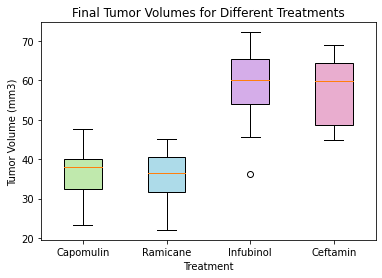

<Figure size 432x288 with 0 Axes>

In [285]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_list = [capomulin_df['Tumor Volume (mm3)'], 
             ramicane_df['Tumor Volume (mm3)'], 
             infubinol_df['Tumor Volume (mm3)'], 
             ceftamin_df['Tumor Volume (mm3)']]
#boxplot
bplot = plt.boxplot(x=data_list, labels=treatments, patch_artist=True)
#title and axis labels
plt.title("Final Tumor Volumes for Different Treatments")
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm3)")
#add color
colors = ["#C0E9AD","#ADDBE9", "#D5ADE9", "#E9ADCF"]
for patch,color in zip(bplot['boxes'],colors):
    patch.set_facecolor(color)
#show plot
plt.show()
#save plot
plt.savefig('images/tumorvol_boxplots.png')

## Line and Scatter Plots

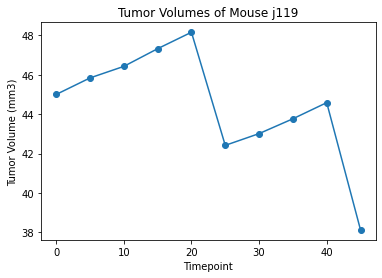

<Figure size 432x288 with 0 Axes>

In [286]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
all_capomulin = clean_df[clean_df['Drug Regimen']=='Capomulin']
all_mice = all_capomulin['Mouse ID'].unique()
random_num = randint(0, len(all_mice))
random_id = all_mice[random_num]
random_mouse = all_capomulin[all_capomulin['Mouse ID']==random_id]
plt.plot(random_mouse['Timepoint'], random_mouse['Tumor Volume (mm3)'], 'o-')
plt.title(f'Tumor Volumes of Mouse {random_id}')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.show()
plt.savefig('images/random_capo_mouse.png')

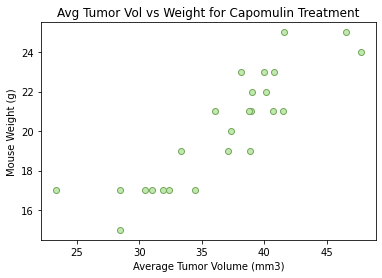

<Figure size 432x288 with 0 Axes>

In [287]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_df.groupby('Mouse ID').mean()

#scatterplot
plt.scatter(capomulin_avg['Tumor Volume (mm3)'], capomulin_avg['Weight (g)'], 
           marker = "o", color="#C0E9AD", edgecolors="#75A75D")
#title and axis labels
plt.title("Avg Tumor Vol vs Weight for Capomulin Treatment")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
#show plot
plt.show()
#save plot
plt.savefig('images/capo_tumorvol_weight_scatter.png')


## Correlation and Regression

In [288]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation
x_values = capomulin_avg['Tumor Volume (mm3)']
y_values = capomulin_avg['Weight (g)']
correlation = st.pearsonr(x_values, y_values)
print(f'The correlation between tumor volume and mouse weight is {round(correlation[0],2)}')

The correlation between tumor volume and mouse weight is 0.88


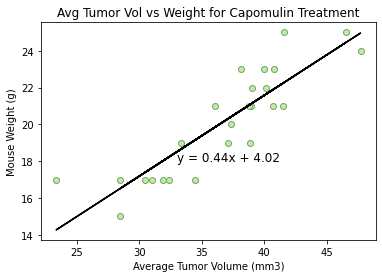

<Figure size 432x288 with 0 Axes>

In [289]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#scatterplot
plt.scatter(x_values, y_values, marker = "o", color="#C0E9AD", edgecolors="#75A75D")
#regression line
plt.plot(x_values, regress_values, color="#000000")
#title and axis labels
plt.title("Avg Tumor Vol vs Weight for Capomulin Treatment")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
#add regression line equation to plot
plt.annotate(line_eq, (33,18), fontsize=12, color="#000000")
plt.show()
plt.savefig('images/capo_tumorvol_weight_regression.png')